In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-numpy/mnist.npz


# NEURAL NETWORKS PROJECT

<font size = 6><strong>Teammates</strong></font>  : 
* <font size = 5><em>Shamso Osman</em></font>
* <font size = 5><em>Donna Fedha</em></font>
* <font size = 5><em>Caleb Njaramba</em></font>

            
## HANDWRITING RECOGNITION USING TENSORFLOW LIBRARIES AND MNIST DATASETS

### 1. Import the libraries necessary for implementation

The first step is to download and install the libraries. These are:

a. Tensorflow version 2.1

b. Tensorflow_datasets

Next, using the import function, we import the module functions that will be
reused in the network. These functions are:

* numpy - will be used as a numerical function.

* matplotlib – will be used to plot/chart graphs for visualization.

* Tensorflow.

* tensorflow_datasets – will serve as the source of our dataset.

* _future_ – allows our codebase to be compatible to support both Python 2
and Python 3.

* %matplotlib inline - enables inline plotting, where the plots/graphs are
displayed just below.

* warnings - issues an alert to the user of certain conditions which aren't
exactly exceptions.




In [2]:
from __future__ import absolute_import, division, print_function
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfs
%matplotlib inline
import warnings
warnings.simplefilter("ignore")

### 2. Tensorflow dataset and visualization of the data.

– The TensorFlow library contains different modules that allows us to call functions that aid in downloading the dataset instead of having to
install through pip the Keras library and MNIST.

– The dataset is divided into two categories:

a. Train dataset – this dataset is used in training the neural network.

b. Test dataset – this dataset is used to test if the training of the neural network was successful.

11501568/11490434 [==============================] - 0s 0us/step


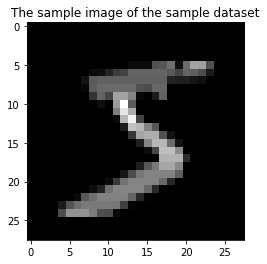

In [3]:
mnist = tf.keras.datasets.mnist #28x28 pixel images of hand-written digits
(x_train, y_train), (x_test, y_test)= mnist.load_data()
x_train= tf.keras.utils.normalize(x_train)
x_test= tf.keras.utils.normalize(x_test, axis=1)
plt.imshow(x_train[0], cmap = 'gray')
plt.title('The sample image of the sample dataset')
plt.show()

If you'd like to execute a larger dataset sample, then we execute this
code:

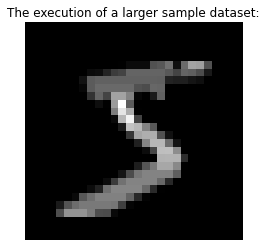

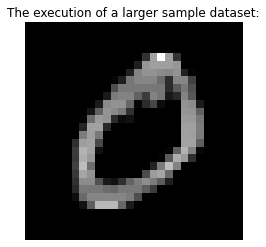

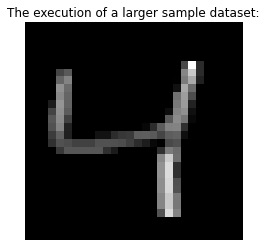

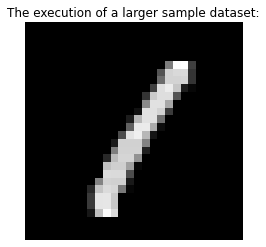

In [4]:
for i in range(0,4):
    plt.imshow(x_train[i])
    plt.title('The execution of a larger sample dataset:')
    plt.axis('off')
    plt.gray()
    plt.show()

### 3. Training the Neural Network
While training the neural network, we used these TensorFlow library functions:

a. tf. Models.Sequential - this ensures the data.

b. tf.keras.Flatten - changes the input dataset from 3D to 2D dataset.

c. tf.keras.layers.Dense - implements hidden layers.

d. Activation function e.g: ReLu - for non-linear dataset, and Softmax - to map the datasets from the hidden layers towards one output.

e. Epochs - this is the number of times the dataset is passed forward and back in the neural network.

f. Optimizers are used to ensure optimal results are obtained.

g. Loss is used to estimate the error from the desired results.

h. Metrics = ['accuracy'] is used to estimate the accuracy of the model to
the desired solution.

In [5]:
model= tf.keras.models.Sequential()
#if the input to the layer has a rank greater than 2, then it is flattened prior
model.add(tf.keras.layers.Flatten())
#being a case of a non-linear dataset, we used a non-linear activation function: ReLu(rectified linear unit)
#unlike Sigmoid and Hyperbolic function activation, ReLu was able to overcome the vanishing gradient problem
model.add(tf.keras.layers.Dense(150, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(150, activation=tf.nn.relu))

model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,y_train, epochs=4)

2022-04-05 15:30:23.232220: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-04-05 15:30:23.742226: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/4
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2484 - accuracy: 0.9263
Epoch 2/4
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1009 - accuracy: 0.9686
Epoch 3/4
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0708 - accuracy: 0.9782
Epoch 4/4
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0526 - accuracy: 0.9831


### 4. Running a prediction for the test dataset

In [6]:
loss_value, acc_value = model.evaluate(x_test,y_test)
print(loss_value, acc_value)

313/313 [==============================] - 2s 3ms/step - loss: 0.2415 - accuracy: 0.9354
0.24153810739517212 0.9354000091552734


In [7]:
model.save('handwriting_reader.model') #saves the model
new_model = tf.keras.models.load_model('handwriting_reader.model')
predictions = model.predict([x_test])

2022-04-05 15:30:51.381525: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


<function matplotlib.pyplot.show(close=None, block=None)>

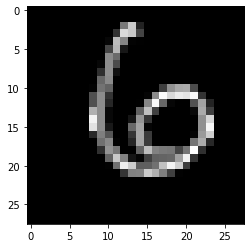

In [8]:
plt.imshow(x_test[100])
plt.show


Estimation of the Loss and Accuracy of the model
A multilayer neural network has the tendency of memorizing a dataset.
Therefore, we used the test dataset.
We also called the model.evaluate() function to estimate the true
accuracy and loss of the model. The accuracy was 0.9436 and the loss
was 0.2068.

In [9]:
print(np.argmax(predictions[100]))

6
